### Loading and Pre-processing Data 

In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score

In [3]:
pneum = pd.read_csv('pneum_train_betti.csv')
breast = pd.read_csv('breast_train_betti.csv')

In [4]:
pneumdf = pd.DataFrame(pneum)
breastdf = pd.DataFrame(breast)

In [5]:
pneumtarget = pneumdf['1']
pneumdf.drop(['0', '1'], axis = 1, inplace = True)
pneumtarget = pneumtarget.str.replace('[\[\]]', '', regex=True).astype(int)

In [6]:
breasttarget = breastdf['1']
breastdf.drop(['0', '1'], axis = 1, inplace = True)
breasttarget = breasttarget.str.replace('[\[\]]', '', regex=True).astype(int)

### Pneumonia Betti Curves

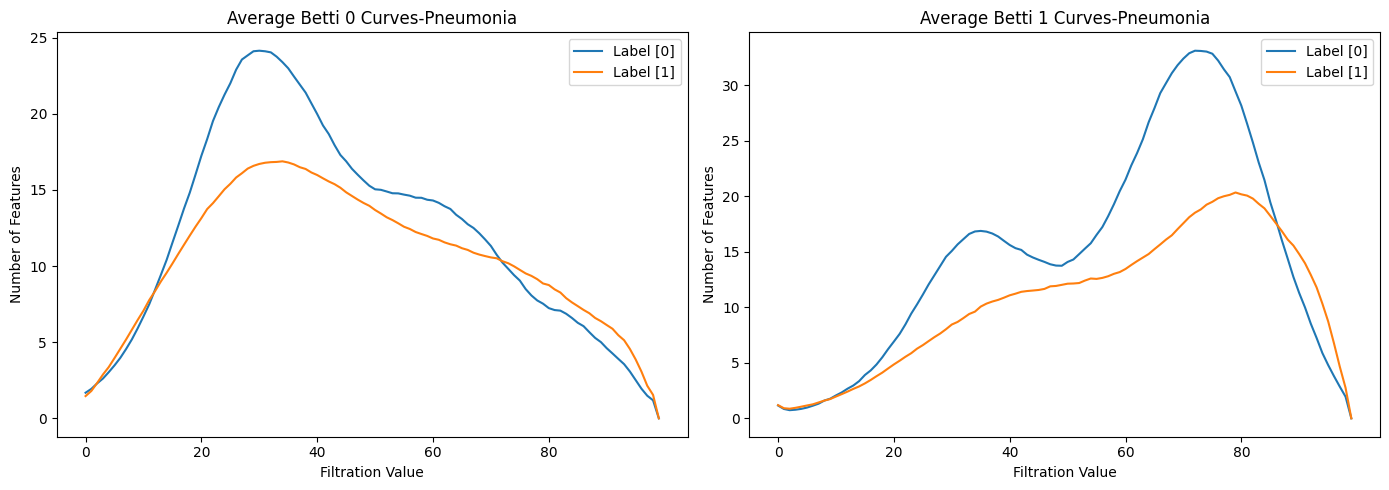

In [54]:
import matplotlib.pyplot as plt

pneum_betti0_columns = pneum.columns[2:102]
pneum_betti1_columns = pneum.columns[102:202]  

# Compute average Betti curves for each label
average_betti0 = pneum.groupby('1')[pneum_betti0_columns].mean()
average_betti1 = pneum.groupby('1')[pneum_betti1_columns].mean()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for label in average_betti0.index:
    axes[0].plot(average_betti0.loc[label], label=f'Label {label}')
    axes[1].plot(average_betti1.loc[label], label=f'Label {label}')

axes[0].set_title('Average Betti 0 Curves-Pneumonia')
axes[1].set_title('Average Betti 1 Curves-Pneumonia')
for ax in axes:
    ax.set_xticks(range(0, len(pneum_betti0_columns), 20))  
    ax.set_xticklabels(range(0, len(pneum_betti1_columns), 20))
    ax.set_xlabel('Filtration Value')
    ax.set_ylabel('Number of Features')
    ax.legend()

plt.tight_layout()
plt.show()


### Breast Cancer Betti Curves

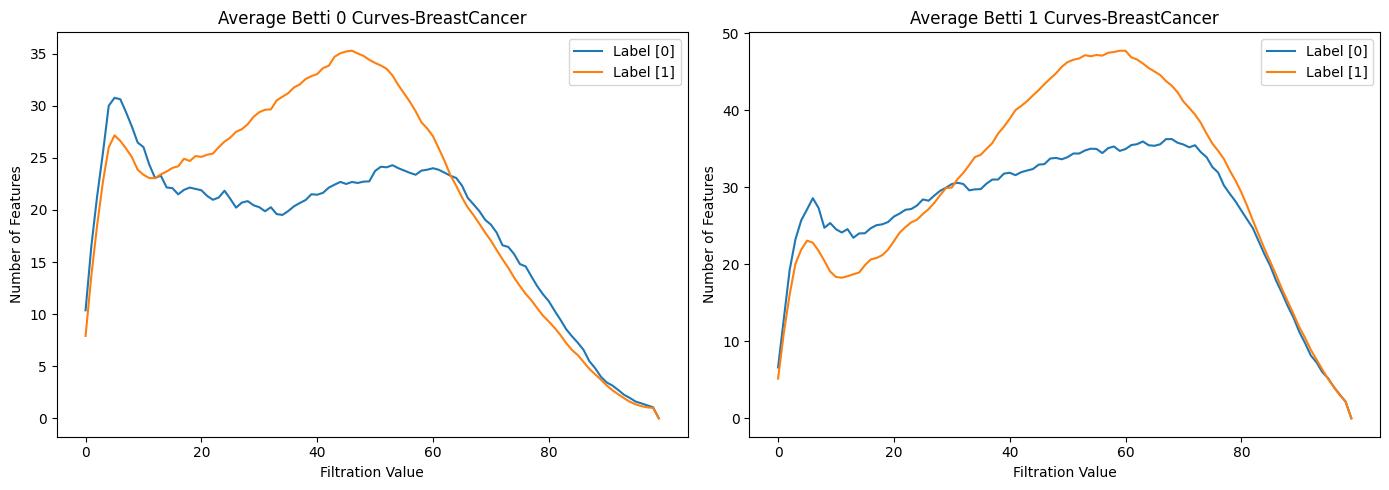

In [55]:
bc_betti0_columns = breast.columns[2:102]
bc_betti1_columns = breast.columns[102:202]

average_betti0 = breast.groupby('1')[bc_betti0_columns].mean()
average_betti1 = breast.groupby('1')[bc_betti1_columns].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for label in average_betti0.index:
    axes[0].plot(average_betti0.loc[label], label=f'Label {label}')
    axes[1].plot(average_betti1.loc[label], label=f'Label {label}')

axes[0].set_title('Average Betti 0 Curves-BreastCancer')
axes[1].set_title('Average Betti 1 Curves-BreastCancer')
for ax in axes:
    ax.set_xticks(range(0, len(bc_betti0_columns), 20))  
    ax.set_xticklabels(range(0, len(bc_betti1_columns), 20))
    ax.set_xlabel('Filtration Value')
    ax.set_ylabel('Number of Features')
    ax.legend()

plt.tight_layout()
plt.show()


### XGB Breast Cancer

In [50]:
X_train, X_test, y_train, y_test = train_test_split(breastdf, breasttarget, test_size=0.1, random_state=42)

model = xgb.XGBClassifier(objective='binary:logistic')

model.fit(X_train, y_train)

normal_prediction = model.predict(X_test)

accuracy = accuracy_score(y_test, normal_prediction)

print(f"Accuracy: {accuracy * 100:.2f}%")

probabilities = model.predict_proba(X_test)[:, 1]  

auc = roc_auc_score(y_test, probabilities)
print(f"AUC before feature selection: {auc * 100:.2f}%")

Accuracy: 87.27%
AUC before feature selection: 85.74%


### + Feature Selection

In [51]:
threshold = 0.01
important_features = [column for column, importance in zip(breastdf.columns, model.feature_importances_) if importance > threshold]

# Filter the datasets
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

# Retrain model with selected features
model.fit(X_train_filtered, y_train)

# Calculate accuracy after feature selection
filtered_prediction = model.predict(X_test_filtered)
accuracy_filtered = accuracy_score(y_test, filtered_prediction)
print(f"Accuracy after feature selection: {accuracy_filtered * 100:.2f}%")

probabilities = model.predict_proba(X_test_filtered)[:, 1]  

auc = roc_auc_score(y_test, probabilities)
print(f"AUC before feature selection: {auc * 100:.2f}%")


Accuracy after feature selection: 85.45%
AUC before feature selection: 94.01%


### XGB Pneumonia

In [52]:
X_train, X_test, y_train, y_test = train_test_split(pneumdf, pneumtarget, test_size=0.1, random_state=42)

model = xgb.XGBClassifier(objective='binary:logistic')

model.fit(X_train, y_train)

normal_prediction = model.predict(X_test)

accuracy = accuracy_score(y_test, normal_prediction)

print(f"Accuracy: {accuracy * 100:.2f}%")

probabilities = model.predict_proba(X_test)[:, 1]  

auc = roc_auc_score(y_test, probabilities)
print(f"AUC before feature selection: {auc * 100:.2f}%")

Accuracy: 88.75%
AUC before feature selection: 94.85%


### + Feature Selection

In [53]:
threshold = 0.01 
important_features = [column for column, importance in zip(pneumdf.columns, model.feature_importances_) if importance > threshold]

# Filter the datasets
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

# Retrain model with selected features
model.fit(X_train_filtered, y_train)

# Calculate accuracy after feature selection
filtered_prediction = model.predict(X_test_filtered)
accuracy_filtered = accuracy_score(y_test, filtered_prediction)
print(f"Accuracy after feature selection: {accuracy_filtered * 100:.2f}%")

probabilities = model.predict_proba(X_test_filtered)[:, 1]  

auc = roc_auc_score(y_test, probabilities)
print(f"AUC before feature selection: {auc * 100:.2f}%")

Accuracy after feature selection: 83.65%
AUC before feature selection: 86.96%


### Pycaret Pneumonia

In [54]:
pneum = pd.read_csv('pneum_train_betti.csv')
breast = pd.read_csv('breast_train_betti.csv')

In [55]:
pneumdf = pd.DataFrame(pneum)
breastdf = pd.DataFrame(breast)

In [56]:
pneumdf.drop(['0'], axis = 1, inplace = True)

In [59]:
pneumdf['1'] = pneumdf['1'].str.replace('[\[\]]', '', regex=True).astype(int)

In [53]:
from pycaret.classification import *

In [72]:
clf = setup(data=pneumdf, target='1', session_id=42)

,Description,Value
0,Session id,42
1,Target,1
2,Target type,Binary
3,Original data shape,"(4708, 201)"
4,Transformed data shape,"(4708, 201)"
5,Transformed train set shape,"(3295, 201)"
6,Transformed test set shape,"(1413, 201)"
7,Numeric features,200
8,Preprocess,True
9,Imputation type,simple


In [73]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8947,0.9522,0.9362,0.9234,0.9296,0.7207,0.7220,0.1550
et,Extra Trees Classifier,0.8859,0.9414,0.9329,0.9153,0.9238,0.6962,0.6979,0.1170
knn,K Neighbors Classifier,0.8819,0.9291,0.9031,0.9358,0.9190,0.7014,0.7037,0.2650
gbc,Gradient Boosting Classifier,0.8816,0.9400,0.9321,0.9109,0.9212,0.6832,0.6851,0.7550
rf,Random Forest Classifier,0.8783,0.9365,0.9292,0.9092,0.9189,0.6746,0.6763,0.2020
lda,Linear Discriminant Analysis,0.8616,0.9000,0.9075,0.9061,0.9067,0.6383,0.6386,0.0470
ridge,Ridge Classifier,0.8604,0.0000,0.9161,0.8978,0.9068,0.6284,0.6293,0.0170
ada,Ada Boost Classifier,0.8549,0.9055,0.9129,0.8942,0.9033,0.6129,0.6143,0.1620
lr,Logistic Regression,0.8525,0.8960,0.9125,0.8914,0.9017,0.6060,0.6070,2.8220
qda,Quadratic Discriminant Analysis,0.8212,0.8576,0.9513,0.8321,0.8877,0.4595,0.4854,0.0340


### Pycaret Breast Cancer

In [76]:
breastdf.drop(['0'], axis = 1, inplace = True)
breastdf['1'] = breastdf['1'].str.replace('[\[\]]', '', regex=True).astype(int)

In [77]:
clf = setup(data=breastdf, target='1', session_id=42)
best_model = compare_models()

,Description,Value
0,Session id,42
1,Target,1
2,Target type,Binary
3,Original data shape,"(546, 201)"
4,Transformed data shape,"(546, 201)"
5,Transformed train set shape,"(382, 201)"
6,Transformed test set shape,"(164, 201)"
7,Numeric features,200
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8142,0.8047,0.9821,0.8078,0.8858,0.4111,0.4836,0.0390
rf,Random Forest Classifier,0.7905,0.7785,0.9533,0.8005,0.8696,0.3534,0.3996,0.0520
gbc,Gradient Boosting Classifier,0.7829,0.7684,0.9176,0.8126,0.8605,0.3715,0.3975,0.1370
xgboost,Extreme Gradient Boosting,0.7827,0.7607,0.9356,0.8028,0.8628,0.3503,0.3856,0.0510
knn,K Neighbors Classifier,0.7490,0.6862,0.8892,0.7934,0.8380,0.2858,0.2987,0.0150
svm,SVM - Linear Kernel,0.7464,0.0000,0.9067,0.7866,0.8344,0.2293,0.2631,0.0100
qda,Quadratic Discriminant Analysis,0.7304,0.5000,1.0000,0.7304,0.8442,0.0000,0.0000,0.0110
dummy,Dummy Classifier,0.7304,0.5000,1.0000,0.7304,0.8442,0.0000,0.0000,0.5070
dt,Decision Tree Classifier,0.7071,0.6255,0.8028,0.7989,0.7997,0.2500,0.2522,0.0130
ada,Ada Boost Classifier,0.7045,0.6312,0.8601,0.7650,0.8089,0.1578,0.1654,0.0400
